In [ ]:
# Import des librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snshttp://www.programmersought.com/article/6198330097/

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import du fichier 
from google.colab import files
upload = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
# Lecture du fichier 
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


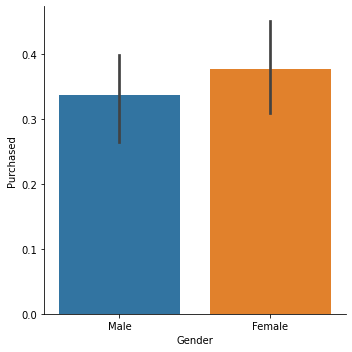

In [ ]:
# Visualisation exploratoire 
sns.catplot(x="Gender", y="Purchased", data=dataset, kind="bar")

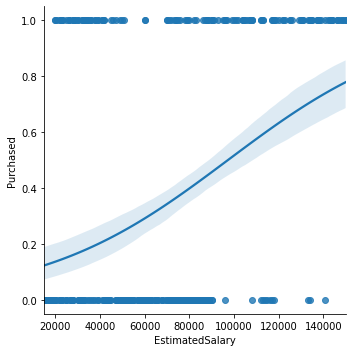

In [ ]:
sns.lmplot(x="EstimatedSalary", y="Purchased", data=dataset, logistic=True)

In [ ]:
# Gestion des NaN 
dataset.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [ ]:
# Enlever la colonne ID
# dataset = dataset.iloc[:, 1:]
dataset = dataset.drop(['User ID'], axis=1)
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
# Séparation des X & y 
# X = dataset.iloc[:, :-1]
# y = dataset.iloc[:, -1]
X = dataset.drop(["Purchased"], axis=1)
y = dataset["Purchased"]

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [ ]:
# Dummyfication 
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [ ]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [ ]:
# Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

In [ ]:
X_train

array([[-0.15807423,  0.15438573, -0.98019606],
       [-0.15807423,  1.62262856,  1.02020406],
       [-0.44461362, -0.28608712, -0.98019606],
       [-0.15807423, -0.52100597,  1.02020406],
       [ 0.41500455,  0.00756145, -0.98019606],
       [-1.11320552, -1.60750566,  1.02020406],
       [ 1.46564897,  2.15119598, -0.98019606],
       [-0.73115301,  1.09406114,  1.02020406],
       [-1.30423178,  0.56549373, -0.98019606],
       [-0.25358736,  0.80041258, -0.98019606],
       [ 0.22397829, -0.31545197,  1.02020406],
       [-1.11320552,  0.41866944, -0.98019606],
       [ 1.27462271,  1.88691227, -0.98019606],
       [-0.92217926,  0.56549373,  1.02020406],
       [ 0.98808332,  1.7988177 , -0.98019606],
       [ 0.79705706, -1.40195167, -0.98019606],
       [-1.87731056,  0.35993973,  1.02020406],
       [ 1.94321462,  0.917872  , -0.98019606],
       [ 1.27462271, -1.37258681,  1.02020406],
       [ 0.79705706,  0.53612887,  1.02020406],
       [-1.78179743,  0.4480343 ,  1.020

In [ ]:
# Application du modèle 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Evaluation du modèle 
print("Train score : {}".format(classifier.score(X_train, y_train)))
print("Test score : {}".format(classifier.score(X_test, y_test)))

Train score : 0.85
Test score : 0.875


--> On a de l'underfitting, dû au peu de données qu'on a dans le test 

In [ ]:
classifier.predict_proba(X_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
X_test

array([[-0.25358736, -1.25512738,  1.02020406],
       [ 0.31949142, -0.72655996,  1.02020406],
       [-0.15807423,  1.65199342, -0.98019606],
       [ 0.98808332,  1.44643942, -0.98019606],
       [-1.01769239, -0.37418169, -0.98019606],
       [-0.54012675, -1.51941109,  1.02020406],
       [-1.6862843 ,  0.47739916,  1.02020406],
       [-0.25358736, -1.37258681, -0.98019606],
       [ 2.13424088,  1.123426  , -0.98019606],
       [-1.78179743, -1.28449224, -0.98019606],
       [ 0.22397829, -0.37418169,  1.02020406],
       [-0.25358736, -0.9027491 ,  1.02020406],
       [ 0.22397829,  0.2424803 ,  1.02020406],
       [-0.25358736, -0.25672226,  1.02020406],
       [-0.0625611 , -0.52100597,  1.02020406],
       [-1.39974491, -1.22576253, -0.98019606],
       [-0.0625611 ,  0.12502088,  1.02020406],
       [ 0.12846516,  0.03692631, -0.98019606],
       [-0.82666613, -0.78528968,  1.02020406],
       [-0.25358736, -0.31545197,  1.02020406],
       [-0.25358736, -0.13926283, -0.980

In [ ]:
# Matrice de confusion 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, classifier.predict(X_test))
cm

array([[55,  5],
       [ 5, 15]])

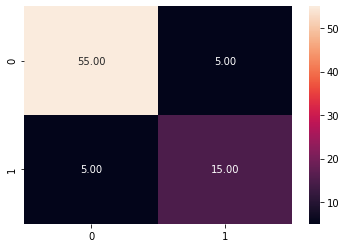

In [ ]:
# Visualisation via Seaborn 
sns.heatmap(cm, annot=True, fmt=".2f")

In [ ]:
classifier.coef_.squeeze()

array([2.27948773, 1.09448846, 0.14137197])

In [ ]:
# Feature importance 
pd.DataFrame({"Features": ["Age", "Estimated Salary", "Gender"],
              "Values": classifier.coef_.squeeze()})

,Features,Values
0,Age,2.279488
1,Estimated Salary,1.094488
2,Gender,0.141372


In [ ]:
48+17+9+6

80

In [ ]:
(48+17) / 80

0.8125

In [ ]:
# Additional info :
# On peut observer que le "Gender" n'est pas significatif comme variable dépendante pour notre modèle, avec un p-value = 0.274

import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                  0.4711
Time:                        22:22:00   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1555      0.171     -6.753      0.000      -1.491      -0.820
x1             2.4810      0.